In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [35]:
# Setting up some global variables
DATASET_FILEPATH = 'Edinburgh Listings Cleaned - Null Values Fixed.csv'

#### Baseline Model

In [33]:
# Import data
data = pd.read_csv(DATASET_FILEPATH).iloc[:, 1:]

# Input features and Target
y = data['price']
X = data.drop('price', axis=1)

# Train test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train Model (RandomForest) 
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
#  Make predictions
y_pred = model.predict(X_test)

# Get scores on test data - R2, RMSE, MAE
r2_baseline = r2_score(y_test, y_pred)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred))
mae_baseline = mean_absolute_error(y_test, y_pred)

print("Baseline model performance")
print()
print(f"R2 score = {r2_baseline}")
print(f"RMSE score = {rmse_baseline}")
print(f"MAE score = {mae_baseline}")

Baseline model performance

R2 score = 0.4523587632291217
RMSE score = 78.93590745635952
MAE score = 36.607644638276035


#### Feature Selection

In [28]:
# Fit PCA model
pca = PCA(n_components=0.99)

pca_X_train = pca.fit_transform(X_train)

print(f"Shape before PCA = {X_train.shape}")
print(f"Shape after PCA = {pca_X_train.shape}")

Shape before PCA = (4545, 6)


In [31]:
# # Build and train Model (RandomForest) 
# model = RandomForestRegressor()
# model.fit(pca_X_train, y_train)

# #  Make predictions
# pca_X_test = pca.transform(X_test)
# y_pred = model.predict(pca_X_test)

# # Get scores on test data - R2, RMSE, MAE
# r2_baseline = r2_score(y_test, y_pred)
# rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred))
# mae_baseline = mean_absolute_error(y_test, y_pred)

# print("Baseline model performance")
# print()
# print(f"R2 score = {r2_baseline}")
# print(f"RMSE score = {rmse_baseline}")
# print(f"MAE score = {mae_baseline}")

Baseline model performance

R2 score = 0.17379386086789128
RMSE score = 96.95511896551126
MAE score = 54.0177882445304


#### Important Features from Lasso and Ridge Regression

In [39]:
# Build and Train Lasso and Ridge regression models
ridge = Ridge()
lasso = Lasso()

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Check scores (performance)

y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Get scores on test data - R2, RMSE, MAE
r2_ridge, r2_lasso = r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)
rmse_ridge, rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_ridge, mae_lasso = mean_absolute_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_lasso)

print("Ridge model performance")
print()
print(f"R2 score = {r2_ridge}")
print(f"RMSE score = {rmse_ridge}")
print(f"MAE score = {mae_ridge}")

print()
print("Lasso model performance")
print()
print(f"R2 score = {r2_lasso}")
print(f"RMSE score = {rmse_lasso}")
print(f"MAE score = {mae_lasso}")

Ridge model performance

R2 score = 0.22958953673583926
RMSE score = 93.62409247481968
MAE score = 44.810265944253516

Lasso model performance

R2 score = 0.2362605448051116
RMSE score = 93.21786421847105
MAE score = 44.60658570776466


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42622.96426071972, tolerance: 4530.705171653511
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:>

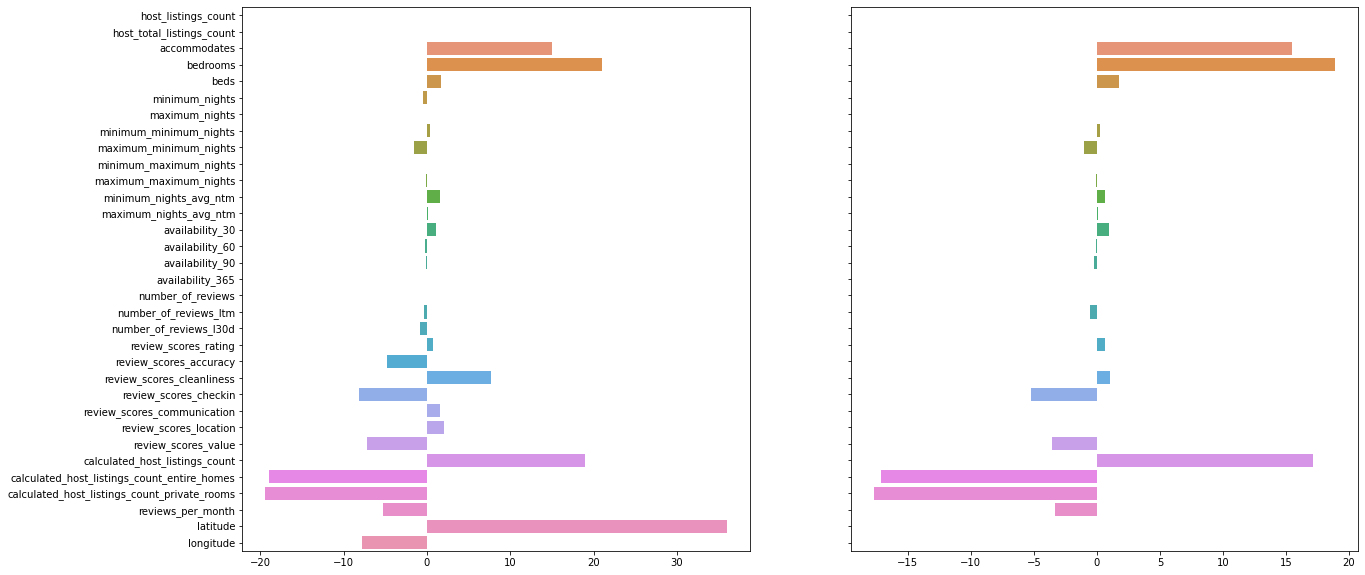

In [44]:
# Get feature importances
ridge_coef, lasso_coef = ridge.coef_, lasso.coef_
feature_names_all = X.columns

# Visualize feature importances
fig, ax = plt.subplots(1, 2, figsize=(20,10), sharey=True)

sns.barplot(y=feature_names_all, x=ridge_coef, ax=ax[0])
sns.barplot(y=feature_names_all, x=lasso_coef, ax=ax[1])

In [48]:
coef_df = pd.DataFrame({'name':feature_names_all, 'ridge':ridge_coef, 'lasso':lasso_coef})
coef_df = coef_df.sort_values(by=['lasso', 'ridge'], ascending=False).reset_index(drop=True)
coef_df

,name,ridge,lasso
0,bedrooms,20.989593,1.890810e+01
1,calculated_host_listings_count,18.930038,1.715505e+01
2,accommodates,15.052034,1.547666e+01
3,beds,1.719448,1.721899e+00
4,review_scores_cleanliness,7.721566,1.075798e+00
5,availability_30,1.135767,9.796094e-01
6,minimum_nights_avg_ntm,1.613852,6.512363e-01
7,review_scores_rating,0.759848,6.076003e-01
8,minimum_minimum_nights,0.372269,2.538619e-01
9,maximum_nights_avg_ntm,0.063392,6.186542e-02


<AxesSubplot:xlabel='lasso', ylabel='name'>

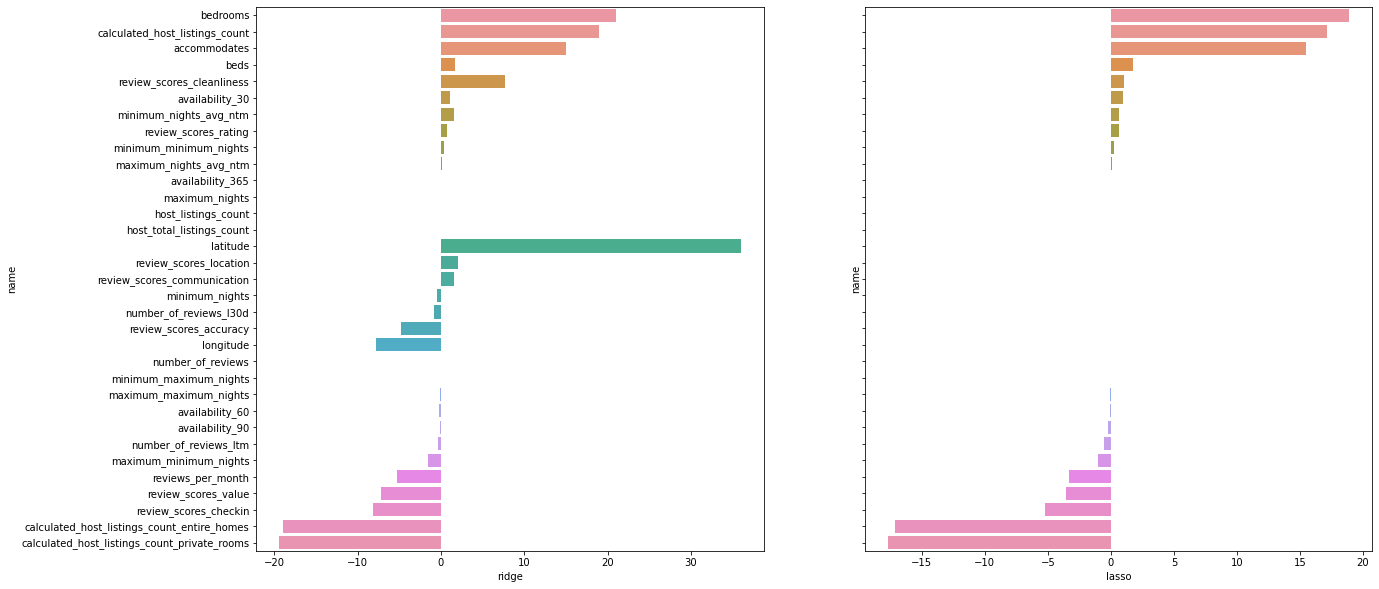

In [80]:
# Visualize feature importances
fig, ax = plt.subplots(1, 2, figsize=(20,10), sharey=True)

sns.barplot(y='name', x='ridge', data=coef_df, ax=ax[0])
sns.barplot(y='name', x='lasso', data=coef_df, ax=ax[1])

In [73]:
lasso_selected_features = coef_df.tail(10)['name'].values.tolist() + coef_df.head(10)['name'].values.tolist()
lasso_selected_features

['maximum_maximum_nights',
 'availability_60',
 'availability_90',
 'number_of_reviews_ltm',
 'maximum_minimum_nights',
 'reviews_per_month',
 'review_scores_value',
 'review_scores_checkin',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'bedrooms',
 'calculated_host_listings_count',
 'accommodates',
 'beds',
 'review_scores_cleanliness',
 'availability_30',
 'minimum_nights_avg_ntm',
 'review_scores_rating',
 'minimum_minimum_nights',
 'maximum_nights_avg_ntm']

#### Important Features from SelectKbest and Chi2

In [57]:
# X_new = SelectKBest(chi2, k=20).fit_transform(X_train, y_train)

# X_new

#### Important Features from RandomForest

In [58]:
# Build and train Model (RandomForest) 
model = RandomForestRegressor()
model.fit(X_train, y_train)

array([0.04201333, 0.04484564, 0.12779439, 0.16734406, 0.02545548,
       0.00551754, 0.01284786, 0.00539304, 0.02232943, 0.00818801,
       0.00672967, 0.01697704, 0.0079032 , 0.01264481, 0.01118013,
       0.01827397, 0.03834752, 0.02249041, 0.02821279, 0.00420172,
       0.02216384, 0.00277765, 0.00499806, 0.00431709, 0.00262263,
       0.0028972 , 0.00363683, 0.05577382, 0.06903755, 0.03706601,
       0.0661587 , 0.05125997, 0.0486006 ])

<AxesSubplot:xlabel='rf', ylabel='name'>

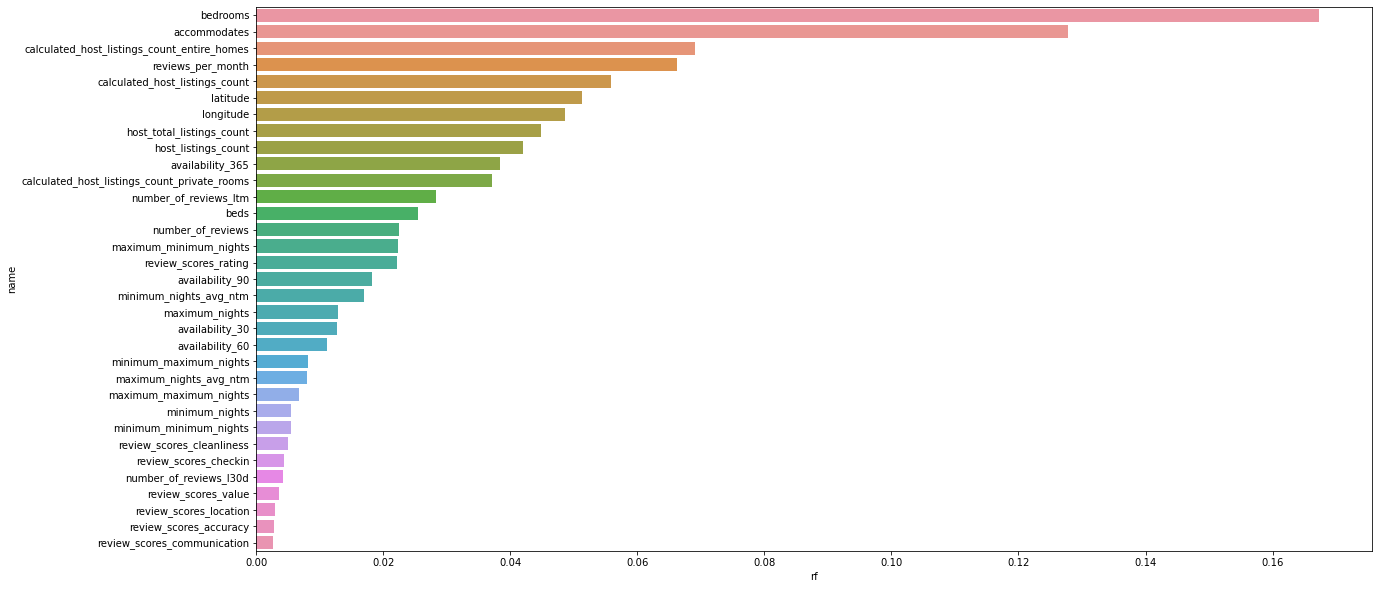

In [60]:
rf_imp = model.feature_importances_
imp_df = pd.DataFrame({'name':feature_names_all, 'rf':rf_imp})

imp_df = imp_df.sort_values(by='rf', ascending=False)

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(y='name', x='rf', data=imp_df, ax=ax)

#### Conclusion

In [74]:
# Build a model using the features selected by Lasso Regression/Regularization

# Input features and Target
y = data['price']
X = data.loc[:, lasso_selected_features]

# Train test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train Model (RandomForest) 
model = RandomForestRegressor()
model.fit(X_train, y_train)

#  Make predictions
y_pred = model.predict(X_test)

# Get scores on test data - R2, RMSE, MAE
r2_baseline = r2_score(y_test, y_pred)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred))
mae_baseline = mean_absolute_error(y_test, y_pred)

print("Baseline model performance")
print()
print(f"R2 score = {r2_baseline}")
print(f"RMSE score = {rmse_baseline}")
print(f"MAE score = {mae_baseline}")

Baseline model performance

R2 score = 0.42829801745953633
RMSE score = 80.65130219041828
MAE score = 38.124452344198545


<AxesSubplot:xlabel='rf', ylabel='name'>

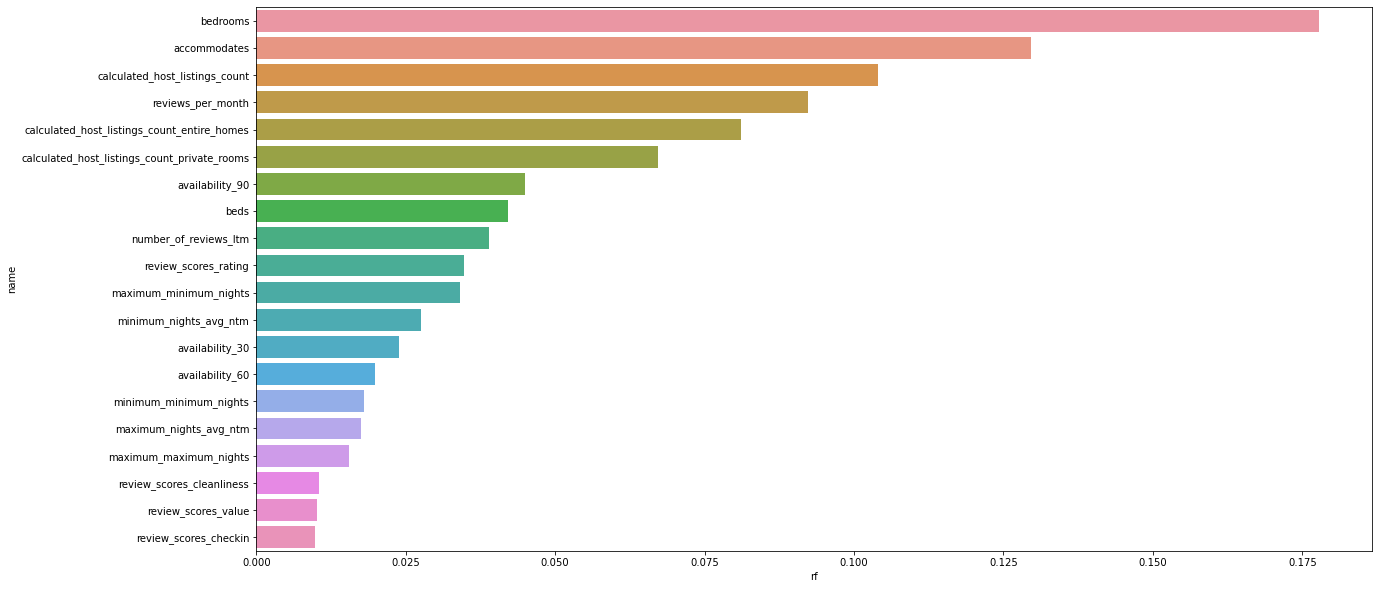

In [75]:
rf_imp = model.feature_importances_
imp_df = pd.DataFrame({'name':lasso_selected_features, 'rf':rf_imp})

imp_df = imp_df.sort_values(by='rf', ascending=False)

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(y='name', x='rf', data=imp_df, ax=ax)